clase 2 en los puntos de equilibrio los denominadores estan al reves

F(x,y)=(F1,F2)=(x`,y`)

Hay que evaluar la matriz jacobiana en el 0 0 y esa matriz es dF1/dx dF1/dy | dF2/dx dF2/dy

calculamos autovalores de la matriz evaluada en los puntos de equilibrio (si la parte real es negativa es estable)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate
from ipywidgets import interactive, fixed

In [ ]:
#population = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Modelado/population.csv")

In [ ]:
a = 1 #ver on a positivo y negativo

x0 = 80
y0 = 30

In [1]:
def derivadas(X, t, a):
  x, y = X
  dotx = -y + a*x*(x**2 + y**2)
  doty = x+ a * y * (x**2 + y**2)
  return np.array([ dotx , doty])

In [ ]:
Nt = 1000
tmax = 20
t = np.linspace(0,tmax,Nt)
X0 = [x0,y0]
res = integrate.odeint(derivadas, X0, t, args =(a,))
x,y = res.T

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


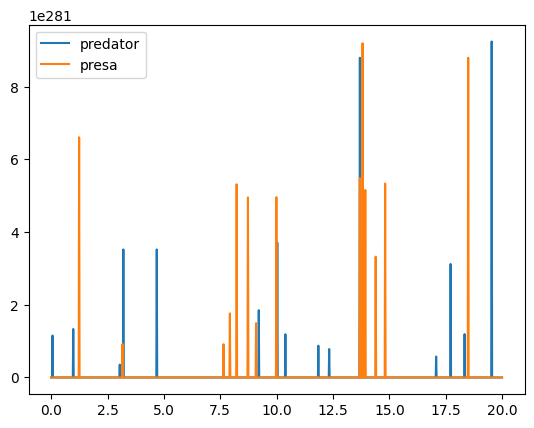

In [ ]:
plt.plot(t,x,label="predator")
plt.plot(t,y,label = "presa")
plt.legend()

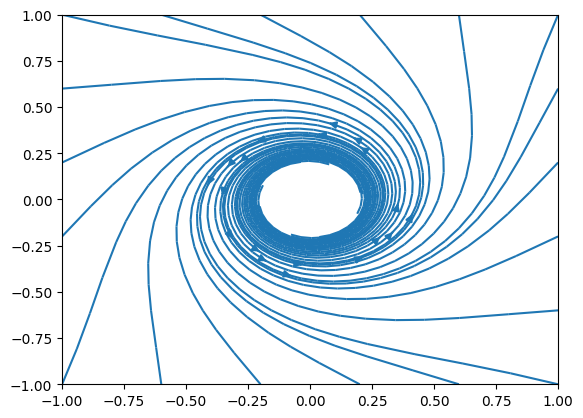

In [ ]:
w_1 = -1
w_2 = 1
Y, X = np.mgrid[w_1:w_2:100j , w_1:w_2:100j] #elijo limites
U = -Y + a*X*(X**2 + Y**2)
V = X + a * Y * (X**2 + Y**2)

plt.streamplot(X,Y,U,V,density = [0.2,0.2], broken_streamlines = False)  #density me da cuantas orbitas quiero
#plt.plot([1], [1], marker = "o", markersize = 6, linestyle = " ", color = "red")
#plt.title("Varying Density)
plt.show()

Hacemos el jacobiano buscando Dx/dt y Dx/dt de la primera y de la segunda


\[
J = \begin{bmatrix}
\frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y} \\
\frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y}
\end{bmatrix}
\]


\[
J = \begin{bmatrix}
3 * a * x^2 + a * y^2 & -1 + 2axy \\
1 + 2ayx & 3a * y^2
\end{bmatrix}
\]



Los autovalores son i y -i

In [ ]:
def derivadasLinearizadas(X, t, a):
  x, y = X
  dotx = -y
  doty = x
  return np.array([ dotx , doty])

In [ ]:
Nt = 1000
tmax = 20
t = np.linspace(0,tmax,Nt)
X0 = [x0,y0]
res = integrate.odeint(derivadasLinearizadas, X0, t, args =(a,))
x,y = res.T

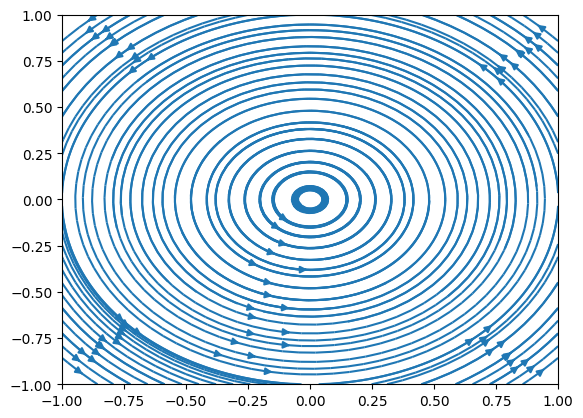

In [ ]:
w_1 = -1
w_2 = 1
Y, X = np.mgrid[w_1:w_2:100j , w_1:w_2:100j] #elijo limites
U = -Y
V = X

plt.streamplot(X,Y,U,V,density = [1,1], broken_streamlines = False)  #density me da cuantas orbitas quiero
#plt.plot([1], [1], marker = "o", markersize = 6, linestyle = " ", color = "red")
#plt.title("Varying Density)
plt.show()

In [ ]:
def derivadas723(X, t):
  x, y = X
  dotx = -x+ 4*y
  doty = -x - y**3
  return np.array([ dotx , doty])

In [ ]:


x0 = 3
y0 = 4

Nt = 1000
tmax = 20
t = np.linspace(0,tmax,Nt)
X0 = [x0,y0]
res = integrate.odeint(derivadas723, X0, t)
x,y = res.T

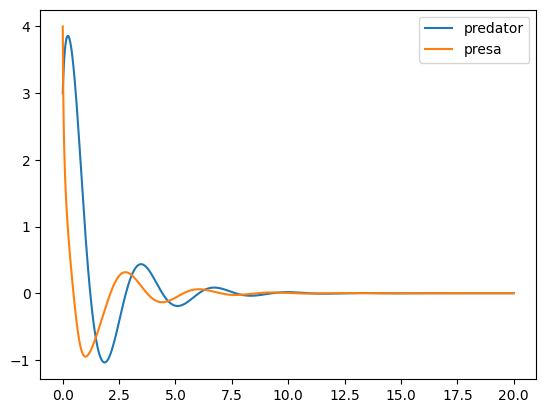

In [ ]:
plt.plot(t,x,label="predator")
plt.plot(t,y,label = "presa")
plt.legend()

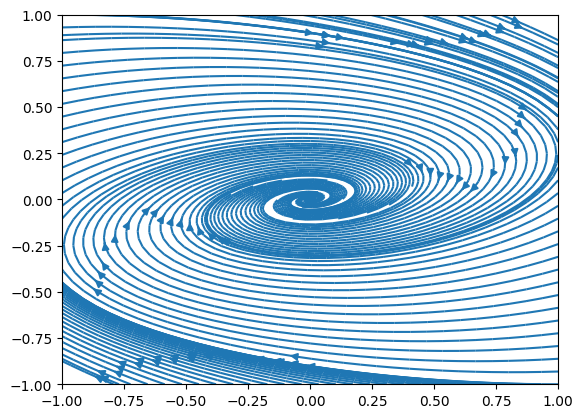

In [ ]:
w_1 = -1
w_2 = 1
Y, X = np.mgrid[w_1:w_2:100j , w_1:w_2:100j] #elijo limites
U = -X+ 4*Y
V =-X - Y**3

plt.streamplot(X,Y,U,V,density = [1,1], broken_streamlines = False)  #density me da cuantas orbitas quiero
#plt.plot([1], [1], marker = "o", markersize = 6, linestyle = " ", color = "red")
#plt.title("Varying Density)
plt.show()

Tenemos la ecuación x'' + m * (x**2 - 1) * x' + x = 0
Hacemos un sistema para tener solo de primer orden
Tomamos y  = x'

x'' = y' =  -m * (x**2 - 1) * x' + x

Entonces

dx/dy = y

dy/dt = -m * (x**2 - 1) * y -x


In [ ]:
mu = 1 #ver on a positivo y 0

x0 = 3
y0 = 4

In [ ]:
def derivadasOscilador(X, t, mu):
  x, y = X
  dotx = y
  doty = -mu * ( x**2 -1 ) * y -x
  return np.array([ dotx , doty])

In [ ]:
Nt = 1000
tmax = 20
t = np.linspace(0,tmax,Nt)
X0 = [x0,y0]
res = integrate.odeint(derivadasOscilador, X0, t, args =(mu,))
x,y = res.T

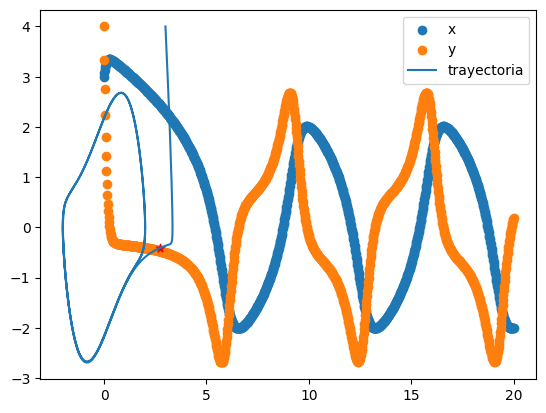

In [ ]:
plt.scatter(t,x,label="x")
plt.scatter(t,y,label = "y")
plt.plot(x,y, label='trayectoria')
plt.scatter(x[100], y[100], c = 'r', marker = '*')
plt.legend()

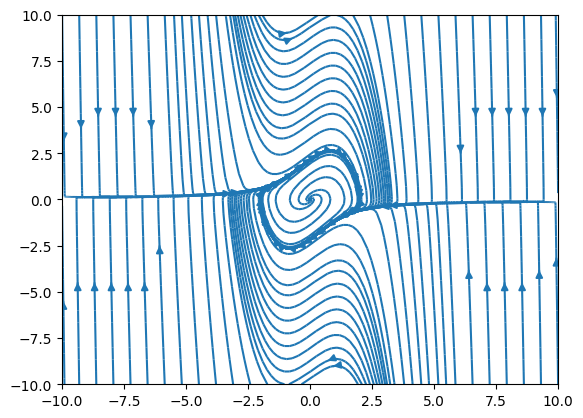

In [ ]:
w_1 = -10
w_2 = 10
Y, X = np.mgrid[w_1:w_2:100j , w_1:w_2:100j] #elijo limites
U = Y
V = -mu * ( X**2 -1 ) * Y - X

plt.streamplot(X,Y,U,V,density = [1,1], broken_streamlines = False)  #density me da cuantas orbitas quiero
#plt.plot([1], [1], marker = "o", markersize = 6, linestyle = " ", color = "red")
#plt.title("Varying Density)
plt.show()

Ejercicio 19 práctica

Tenemos la ecuación m* x'' + b * x' + k * x = f(t,x)


Hacemos un sistema para tener solo de primer orden
Tomamos y  = x'

x'' = y' = ( f(t,x) - k*x - b * x' ) / m

Entonces

dx/dt = y
dy/dt = ( f(t,x) - k*x - b * y ) / m


In [ ]:
def derivadasej19(X, t, k, b, m):
  x, y = X
  dotx = y
  doty = ( np.sin(t) - k*x - b * y ) / m

  return np.array([ dotx , doty])

In [ ]:
k = 1
m = 1
b = 0.01

x0 = 1
y0 = 0

Nt = 1000
tmax = 20
t = np.linspace(0,tmax,Nt)
X0 = [x0,y0]
res = integrate.odeint(derivadasej19, X0, t, args =(k,b,m))
x,y = res.T

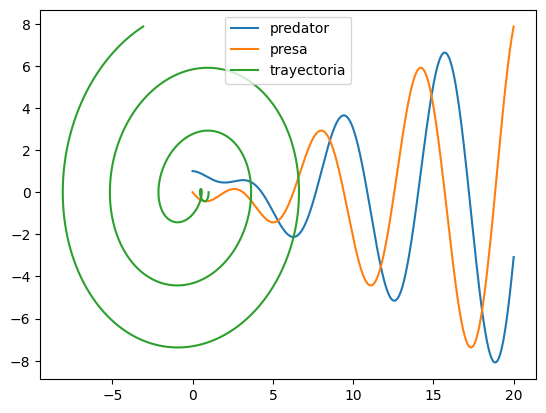

In [ ]:
plt.plot(t,x,label="predator")
plt.plot(t,y,label = "presa")
plt.legend()


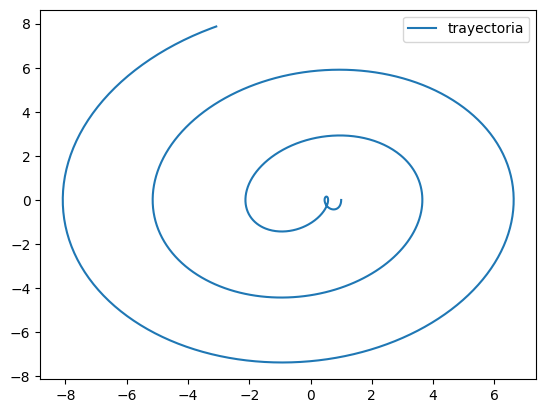

In [ ]:
plt.plot(x,y, label='trayectoria')
plt.legend()

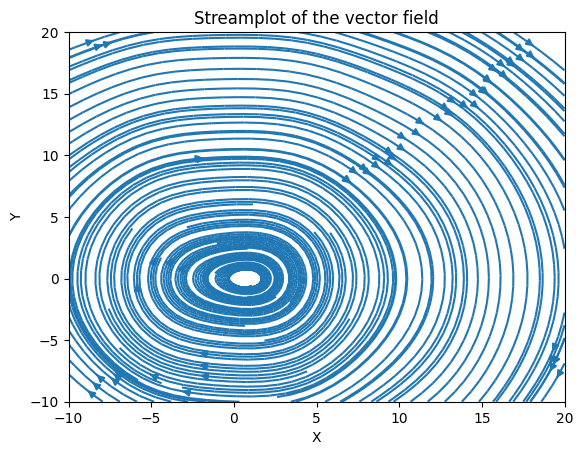

In [ ]:
w_1 = -10
w_2 = 20
Y, X = np.mgrid[w_1:w_2:1000j , w_1:w_2:1000j] #elijo limites
U = Y
V = ( np.sin(t) - k*X - b * Y ) / m

plt.streamplot(X, Y, U, V, density=[1, 1], arrowsize=1, broken_streamlines = False)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Streamplot of the vector field')
plt.show()

In [ ]:
def ploteando(m=30, k =1, b =1):
  res = integrate.odeint(derivadasej19, X0, t, args =(k,b,m))
  x, y = res.T
  plt.plot(x,y)
  plt.show()


In [ ]:
#diagrama de fases (cada linea es una condicion inicial)
p = interactive(ploteando, m=(0,100), k =(0,100), b=(0.,1.) )
display(p)

interactive(children=(IntSlider(value=30, description='m'), IntSlider(value=1, description='k'), FloatSlider(v…